In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f'{year}年{month}月')

2020年3月


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=conn)
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']




In [5]:

join_counts=[conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]]
percents=[]
for i in range(1,month-6+1):
    sql=f"select COUNT(1) from _{year}{month:02} a join _{year}{month-i:02} b on a.job_id = b.job_id"
    #print(sql)
    count=conn.execute(sql).fetchall()[0][0]

    join_counts.append(count)
    subtract = join_counts[i-1]-join_counts[i]
    percents.append(subtract*1.0/join_counts[i])

percents.append(join_counts[-1]/join_counts[0])

In [6]:
join_counts

[69710]

In [7]:
percents

[1.0]

ValueError: 'label' must be of length 'x'

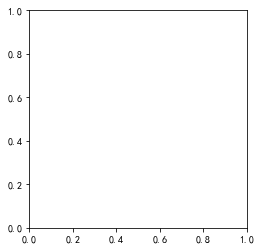

In [8]:
plt.pie(percents, labels=['1','2','3','4','5','6','7','7+'])
plt.show()

In [9]:
data.shape[0]

66103

In [10]:
conn.close()

In [11]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [12]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,22829,6000,21000,45833,7950,3.63%
1,算法工程师,18729,5250,17500,45000,20561,9.39%
0,一般程序员,12918,3750,12000,30000,190240,86.85%
4,生物信息工程师,11143,7000,12000,15933,28,0.01%
3,爬虫工程师,11037,4013,10000,25250,254,0.12%


# 程序员工资

In [13]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,18543,3750,15500,45000,18386,8.39%
上海,17114,5250,15000,37500,34604,15.80%
广东,15016,4500,13000,35000,55152,25.18%
浙江,14328,3250,12500,35000,13897,6.34%
四川,12487,3750,11500,30000,9936,4.54%
江苏,12094,3750,11500,27021,23660,10.80%
天津,12080,5000,10000,25453,1844,0.84%
陕西,11806,3750,10500,27500,5952,2.72%
湖北,11801,3750,10500,26060,11910,5.44%
湖南,11639,4000,11000,25000,5107,2.33%


In [14]:
describe(data_city,'程序员')

2020年3月北京招收程序员18386人。2019年3月北京程序员平均工资18543元，工资中位数15500元，其中95%的人的工资介于3750元到45000元。

2020年3月上海招收程序员34604人。2019年3月上海程序员平均工资17114元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2020年3月广东招收程序员55152人。2019年3月广东程序员平均工资15016元，工资中位数13000元，其中95%的人的工资介于4500元到35000元。

2020年3月浙江招收程序员13897人。2019年3月浙江程序员平均工资14328元，工资中位数12500元，其中95%的人的工资介于3250元到35000元。

2020年3月四川招收程序员9936人。2019年3月四川程序员平均工资12487元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年3月江苏招收程序员23660人。2019年3月江苏程序员平均工资12094元，工资中位数11500元，其中95%的人的工资介于3750元到27021元。

2020年3月天津招收程序员1844人。2019年3月天津程序员平均工资12080元，工资中位数10000元，其中95%的人的工资介于5000元到25453元。

2020年3月陕西招收程序员5952人。2019年3月陕西程序员平均工资11806元，工资中位数10500元，其中95%的人的工资介于3750元到27500元。

2020年3月湖北招收程序员11910人。2019年3月湖北程序员平均工资11801元，工资中位数10500元，其中95%的人的工资介于3750元到26060元。

2020年3月湖南招收程序员5107人。2019年3月湖南程序员平均工资11639元，工资中位数11000元，其中95%的人的工资介于4000元到25000元。

2020年3月重庆招收程序员2884人。2019年3月重庆程序员平均工资11435元，工资中位数10000元，其中95%的人的工资介于4250元到25000元。

2020年3月福建招收程序员4118人。2019年3月福建程序员平均工资10602元，工资中位数10416元，其中95%的人的工资介于3750元到20897元。

2020年3月辽宁招

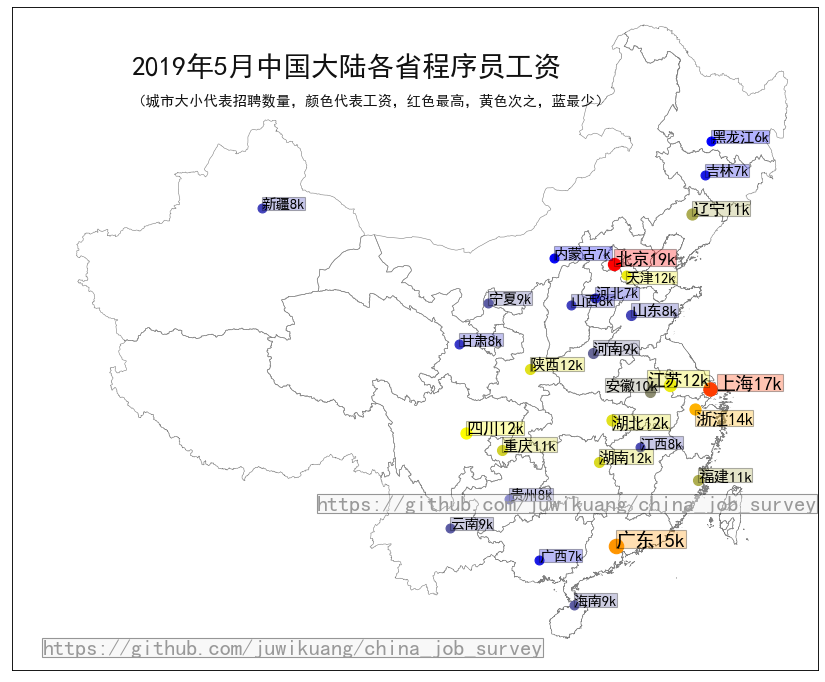

In [15]:
draw_province_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [16]:
describe(get_sub_stats_by_col(data[data.career=='算法工程师'],'province'), '算法工程师')

2020年3月北京招收算法工程师2551人。2019年3月北京算法工程师平均工资22835元，工资中位数20833元，其中95%的人的工资介于6659元到47500元。

2020年3月上海招收算法工程师3904人。2019年3月上海算法工程师平均工资22640元，工资中位数20833元，其中95%的人的工资介于6500元到50000元。

2020年3月广东招收算法工程师5576人。2019年3月广东算法工程师平均工资19514元，工资中位数17500元，其中95%的人的工资介于5250元到45000元。

2020年3月浙江招收算法工程师1404人。2019年3月浙江算法工程师平均工资18880元，工资中位数16500元，其中95%的人的工资介于3750元到45000元。

2020年3月江苏招收算法工程师2485人。2019年3月江苏算法工程师平均工资15694元，工资中位数15000元，其中95%的人的工资介于5223元到31344元。

2020年3月陕西招收算法工程师620人。2019年3月陕西算法工程师平均工资15693元，工资中位数12933元，其中95%的人的工资介于4312元到50000元。

2020年3月天津招收算法工程师164人。2019年3月天津算法工程师平均工资15246元，工资中位数15000元，其中95%的人的工资介于7000元到29100元。

2020年3月安徽招收算法工程师263人。2019年3月安徽算法工程师平均工资15204元，工资中位数12857元，其中95%的人的工资介于6509元到33469元。

2020年3月海南招收算法工程师6人。2019年3月海南算法工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年3月湖北招收算法工程师912人。2019年3月湖北算法工程师平均工资14979元，工资中位数15000元，其中95%的人的工资介于3750元到28389元。

2020年3月湖南招收算法工程师446人。2019年3月湖南算法工程师平均工资14941元，工资中位数14500元，其中95%的人的工资介于7000元到26264元。

2020年3月四川招收算法工程师883人。2019年3月四川算法工程师平均工资14396元，工资中位数12500元，其中9

In [17]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22835,6659,20833,47500,2551,12.41%
上海,22640,6500,20833,50000,3904,18.99%
广东,19514,5250,17500,45000,5576,27.12%
浙江,18880,3750,16500,45000,1404,6.83%
江苏,15694,5223,15000,31344,2485,12.09%
陕西,15693,4312,12933,50000,620,3.02%
天津,15246,7000,15000,29100,164,0.80%
安徽,15204,6509,12857,33469,263,1.28%
海南,15000,15000,15000,15000,6,0.03%
湖北,14979,3750,15000,28389,912,4.44%


In [18]:
describe(data_city_algorithm,'算法工程师')

2020年3月北京招收算法工程师2551人。2019年3月北京算法工程师平均工资22835元，工资中位数20833元，其中95%的人的工资介于6659元到47500元。

2020年3月上海招收算法工程师3904人。2019年3月上海算法工程师平均工资22640元，工资中位数20833元，其中95%的人的工资介于6500元到50000元。

2020年3月广东招收算法工程师5576人。2019年3月广东算法工程师平均工资19514元，工资中位数17500元，其中95%的人的工资介于5250元到45000元。

2020年3月浙江招收算法工程师1404人。2019年3月浙江算法工程师平均工资18880元，工资中位数16500元，其中95%的人的工资介于3750元到45000元。

2020年3月江苏招收算法工程师2485人。2019年3月江苏算法工程师平均工资15694元，工资中位数15000元，其中95%的人的工资介于5223元到31344元。

2020年3月陕西招收算法工程师620人。2019年3月陕西算法工程师平均工资15693元，工资中位数12933元，其中95%的人的工资介于4312元到50000元。

2020年3月天津招收算法工程师164人。2019年3月天津算法工程师平均工资15246元，工资中位数15000元，其中95%的人的工资介于7000元到29100元。

2020年3月安徽招收算法工程师263人。2019年3月安徽算法工程师平均工资15204元，工资中位数12857元，其中95%的人的工资介于6509元到33469元。

2020年3月海南招收算法工程师6人。2019年3月海南算法工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年3月湖北招收算法工程师912人。2019年3月湖北算法工程师平均工资14979元，工资中位数15000元，其中95%的人的工资介于3750元到28389元。

2020年3月湖南招收算法工程师446人。2019年3月湖南算法工程师平均工资14941元，工资中位数14500元，其中95%的人的工资介于7000元到26264元。

2020年3月四川招收算法工程师883人。2019年3月四川算法工程师平均工资14396元，工资中位数12500元，其中9

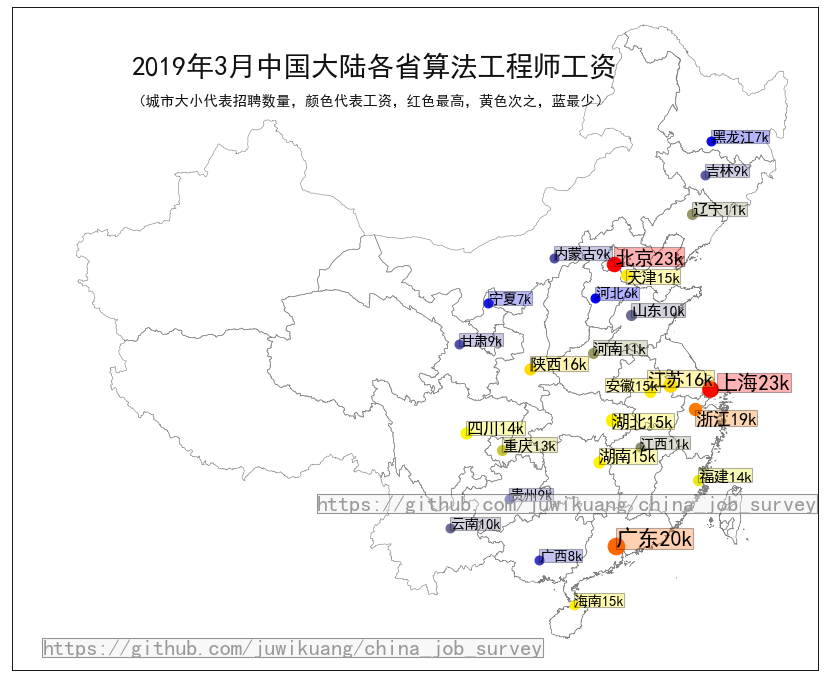

In [19]:
draw_province_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [20]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
河北,33227,12500,31625,75000,11,0.14%
北京,30693,10000,30000,55000,1197,15.06%
浙江,24904,6550,25000,45000,534,6.72%
上海,24433,7000,22500,47500,1578,19.85%
广东,23064,5250,22500,45833,2396,30.14%
四川,19321,6555,17500,44229,217,2.73%
湖南,18375,9000,17500,34062,155,1.95%
江苏,18110,5250,17500,37500,616,7.75%
湖北,17341,7000,17500,33750,350,4.40%
重庆,17074,7114,17500,27500,128,1.61%


In [21]:
describe(data_city_architect,'系统架构师')

2020年3月河北招收系统架构师11人。2019年3月河北系统架构师平均工资33227元，工资中位数31625元，其中95%的人的工资介于12500元到75000元。

2020年3月北京招收系统架构师1197人。2019年3月北京系统架构师平均工资30693元，工资中位数30000元，其中95%的人的工资介于10000元到55000元。

2020年3月浙江招收系统架构师534人。2019年3月浙江系统架构师平均工资24904元，工资中位数25000元，其中95%的人的工资介于6550元到45000元。

2020年3月上海招收系统架构师1578人。2019年3月上海系统架构师平均工资24433元，工资中位数22500元，其中95%的人的工资介于7000元到47500元。

2020年3月广东招收系统架构师2396人。2019年3月广东系统架构师平均工资23064元，工资中位数22500元，其中95%的人的工资介于5250元到45833元。

2020年3月四川招收系统架构师217人。2019年3月四川系统架构师平均工资19321元，工资中位数17500元，其中95%的人的工资介于6555元到44229元。

2020年3月湖南招收系统架构师155人。2019年3月湖南系统架构师平均工资18375元，工资中位数17500元，其中95%的人的工资介于9000元到34062元。

2020年3月江苏招收系统架构师616人。2019年3月江苏系统架构师平均工资18110元，工资中位数17500元，其中95%的人的工资介于5250元到37500元。

2020年3月湖北招收系统架构师350人。2019年3月湖北系统架构师平均工资17341元，工资中位数17500元，其中95%的人的工资介于7000元到33750元。

2020年3月重庆招收系统架构师128人。2019年3月重庆系统架构师平均工资17074元，工资中位数17500元，其中95%的人的工资介于7114元到27500元。

2020年3月陕西招收系统架构师191人。2019年3月陕西系统架构师平均工资16387元，工资中位数14750元，其中95%的人的工资介于5250元到41208元。

2020年3月天津招收系统架构师10人。2019年3月天津系统架构师平均工资15750元，工资中位数15786元，其中95

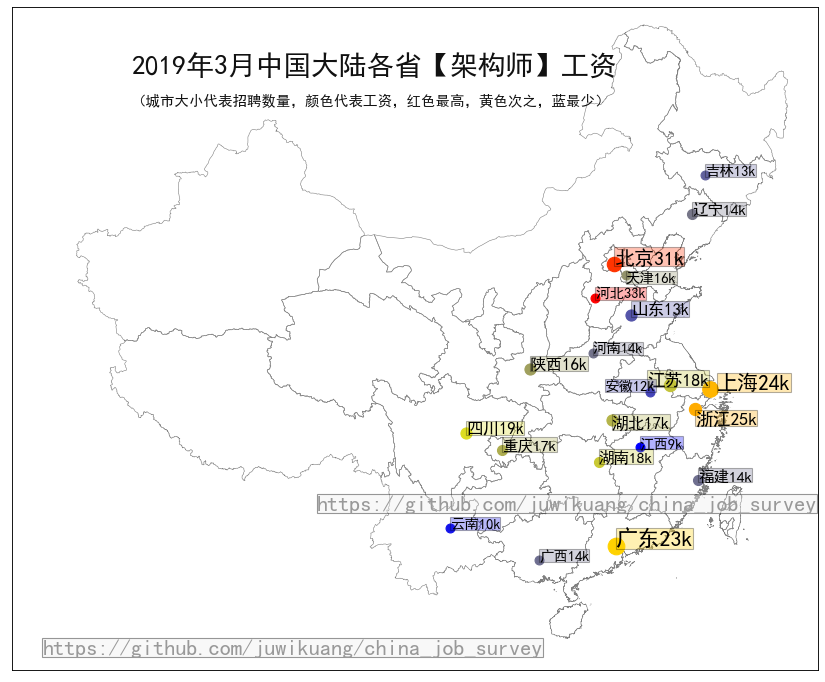

In [22]:
draw_province_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [23]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,15000,15000,15000,15000,5,17.86%
浙江,13750,11500,13750,16000,2,7.14%
广东,11375,7000,11375,14000,8,28.57%
江苏,9875,9000,9875,12500,4,14.29%
上海,9800,8000,9800,12500,5,17.86%
湖北,9000,9000,9000,9000,1,3.57%
广西,7000,7000,7000,7000,3,10.71%


In [24]:
describe(data_bio,'生物信息工程师')

2020年3月北京招收生物信息工程师5人。2019年3月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年3月浙江招收生物信息工程师2人。2019年3月浙江生物信息工程师平均工资13750元，工资中位数13750元，其中95%的人的工资介于11500元到16000元。

2020年3月广东招收生物信息工程师8人。2019年3月广东生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2020年3月江苏招收生物信息工程师4人。2019年3月江苏生物信息工程师平均工资9875元，工资中位数9875元，其中95%的人的工资介于9000元到12500元。

2020年3月上海招收生物信息工程师5人。2019年3月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2020年3月湖北招收生物信息工程师1人。2019年3月湖北生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2020年3月广西招收生物信息工程师3人。2019年3月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



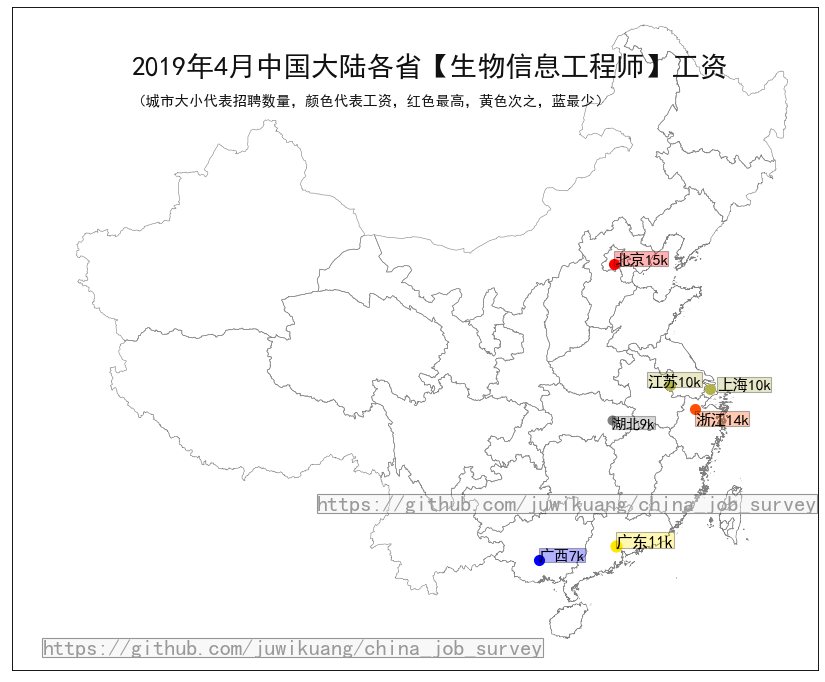

In [25]:
draw_province_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [26]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,16109,11500,17500,20000,23,9.06%
上海,14092,4088,13400,34156,49,19.29%
江苏,11531,7000,11500,20000,16,6.30%
广东,10653,1750,10750,23912,62,24.41%
湖南,8500,7000,9000,9500,15,5.91%
四川,7125,6025,6250,11400,32,12.60%
陕西,6500,5250,6250,9000,14,5.51%


In [27]:
describe(data_spider, '爬虫工程师')

2020年3月北京招收爬虫工程师23人。2019年3月北京爬虫工程师平均工资16109元，工资中位数17500元，其中95%的人的工资介于11500元到20000元。

2020年3月上海招收爬虫工程师49人。2019年3月上海爬虫工程师平均工资14092元，工资中位数13400元，其中95%的人的工资介于4088元到34156元。

2020年3月江苏招收爬虫工程师16人。2019年3月江苏爬虫工程师平均工资11531元，工资中位数11500元，其中95%的人的工资介于7000元到20000元。

2020年3月广东招收爬虫工程师62人。2019年3月广东爬虫工程师平均工资10653元，工资中位数10750元，其中95%的人的工资介于1750元到23912元。

2020年3月湖南招收爬虫工程师15人。2019年3月湖南爬虫工程师平均工资8500元，工资中位数9000元，其中95%的人的工资介于7000元到9500元。

2020年3月四川招收爬虫工程师32人。2019年3月四川爬虫工程师平均工资7125元，工资中位数6250元，其中95%的人的工资介于6025元到11400元。

2020年3月陕西招收爬虫工程师14人。2019年3月陕西爬虫工程师平均工资6500元，工资中位数6250元，其中95%的人的工资介于5250元到9000元。



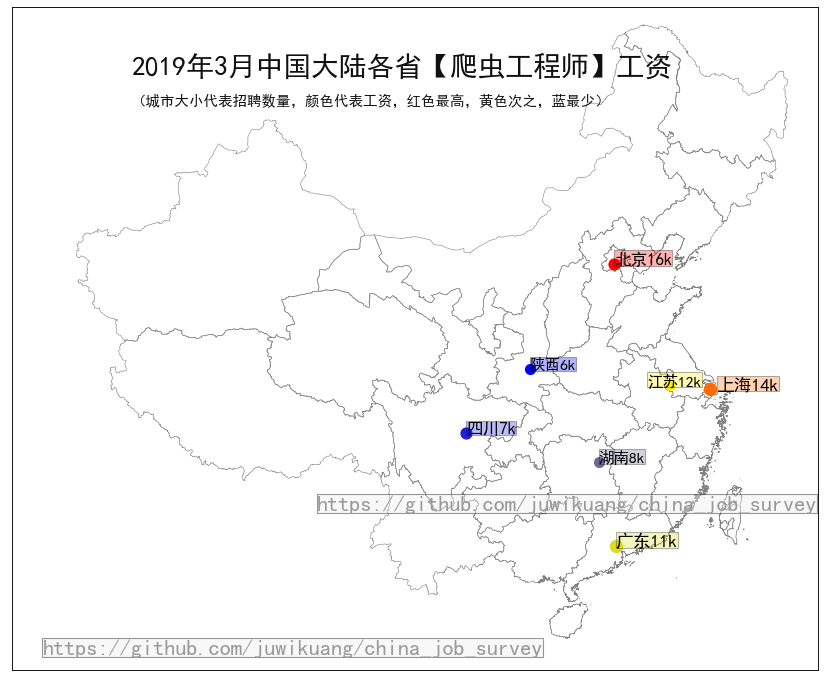

In [28]:
draw_province_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [29]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17363,3750,15000,40000,8307,8.60%
上海,16910,5500,15104,37500,14821,15.35%
广东,14837,4000,13000,33333,23354,24.18%
浙江,14424,3250,12500,35000,6363,6.59%
江苏,11795,3750,11000,26383,10488,10.86%
四川,11749,3750,11000,25000,3724,3.86%
湖北,11426,4000,10000,26000,4688,4.85%
陕西,11402,3750,10500,26825,2634,2.73%
天津,11110,4714,9321,24150,848,0.88%
湖南,10974,2896,10500,25000,2332,2.41%


In [30]:
describe(data_java, 'Java程序员')

2020年3月北京招收Java程序员8307人。2019年3月北京Java程序员平均工资17363元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。

2020年3月上海招收Java程序员14821人。2019年3月上海Java程序员平均工资16910元，工资中位数15104元，其中95%的人的工资介于5500元到37500元。

2020年3月广东招收Java程序员23354人。2019年3月广东Java程序员平均工资14837元，工资中位数13000元，其中95%的人的工资介于4000元到33333元。

2020年3月浙江招收Java程序员6363人。2019年3月浙江Java程序员平均工资14424元，工资中位数12500元，其中95%的人的工资介于3250元到35000元。

2020年3月江苏招收Java程序员10488人。2019年3月江苏Java程序员平均工资11795元，工资中位数11000元，其中95%的人的工资介于3750元到26383元。

2020年3月四川招收Java程序员3724人。2019年3月四川Java程序员平均工资11749元，工资中位数11000元，其中95%的人的工资介于3750元到25000元。

2020年3月湖北招收Java程序员4688人。2019年3月湖北Java程序员平均工资11426元，工资中位数10000元，其中95%的人的工资介于4000元到26000元。

2020年3月陕西招收Java程序员2634人。2019年3月陕西Java程序员平均工资11402元，工资中位数10500元，其中95%的人的工资介于3750元到26825元。

2020年3月天津招收Java程序员848人。2019年3月天津Java程序员平均工资11110元，工资中位数9321元，其中95%的人的工资介于4714元到24150元。

2020年3月湖南招收Java程序员2332人。2019年3月湖南Java程序员平均工资10974元，工资中位数10500元，其中95%的人的工资介于2896元到25000元。

2020年3月重庆招收Java程序员1283人。2019年3月重庆Java程序员平均工资10895元，工资中位数10000元，其中95%的人的工资介于4689元到22500元。

2020年3月辽宁

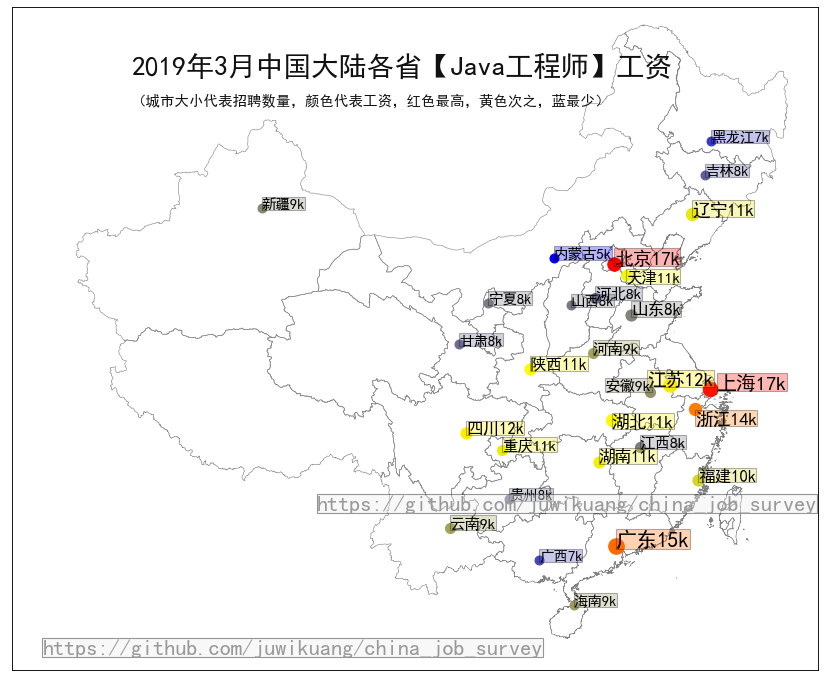

In [31]:
draw_province_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [32]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,23971,5270,22500,46330,3547,13.88%
上海,21024,6326,20000,45000,5001,19.56%
浙江,18930,3750,17500,45000,1565,6.12%
广东,18290,5250,16500,41666,6354,24.86%
四川,15502,3500,13500,35000,1251,4.89%
天津,15165,6654,13000,28622,203,0.79%
山西,15000,15000,15000,15000,5,0.02%
陕西,14617,5250,13500,37482,761,2.98%
湖北,14265,3922,12500,37125,918,3.59%
湖南,14150,4200,12500,25493,584,2.28%


In [33]:
#describe(data_python, 'Python程序员')

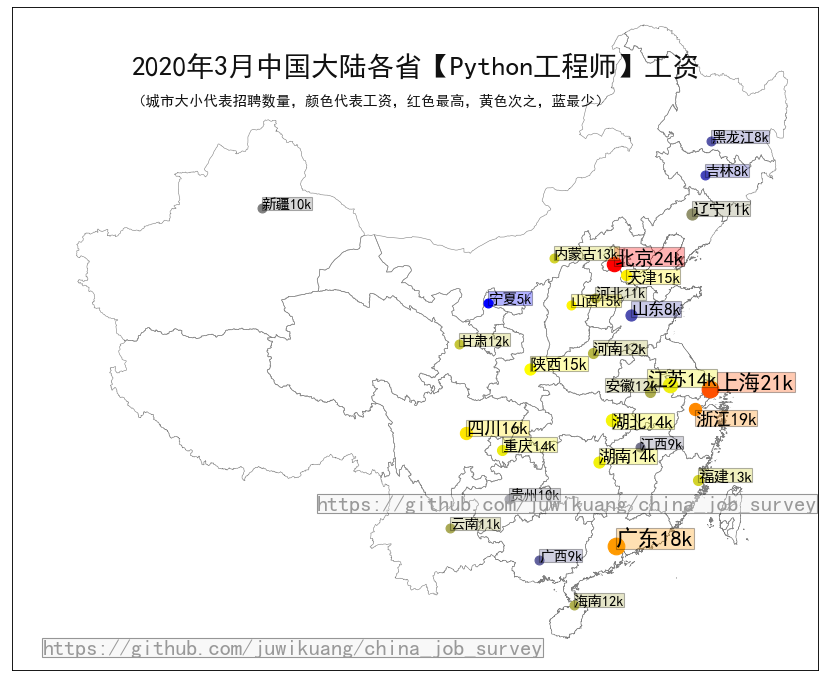

In [34]:
draw_province_map(data_python, 100,  f'{year}年{month}月中国大陆各省【Python工程师】工资')